In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns

C:\Users\nikhi_ntf2doa\AppData\Local\Temp\ipykernel_9732\2828325336.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


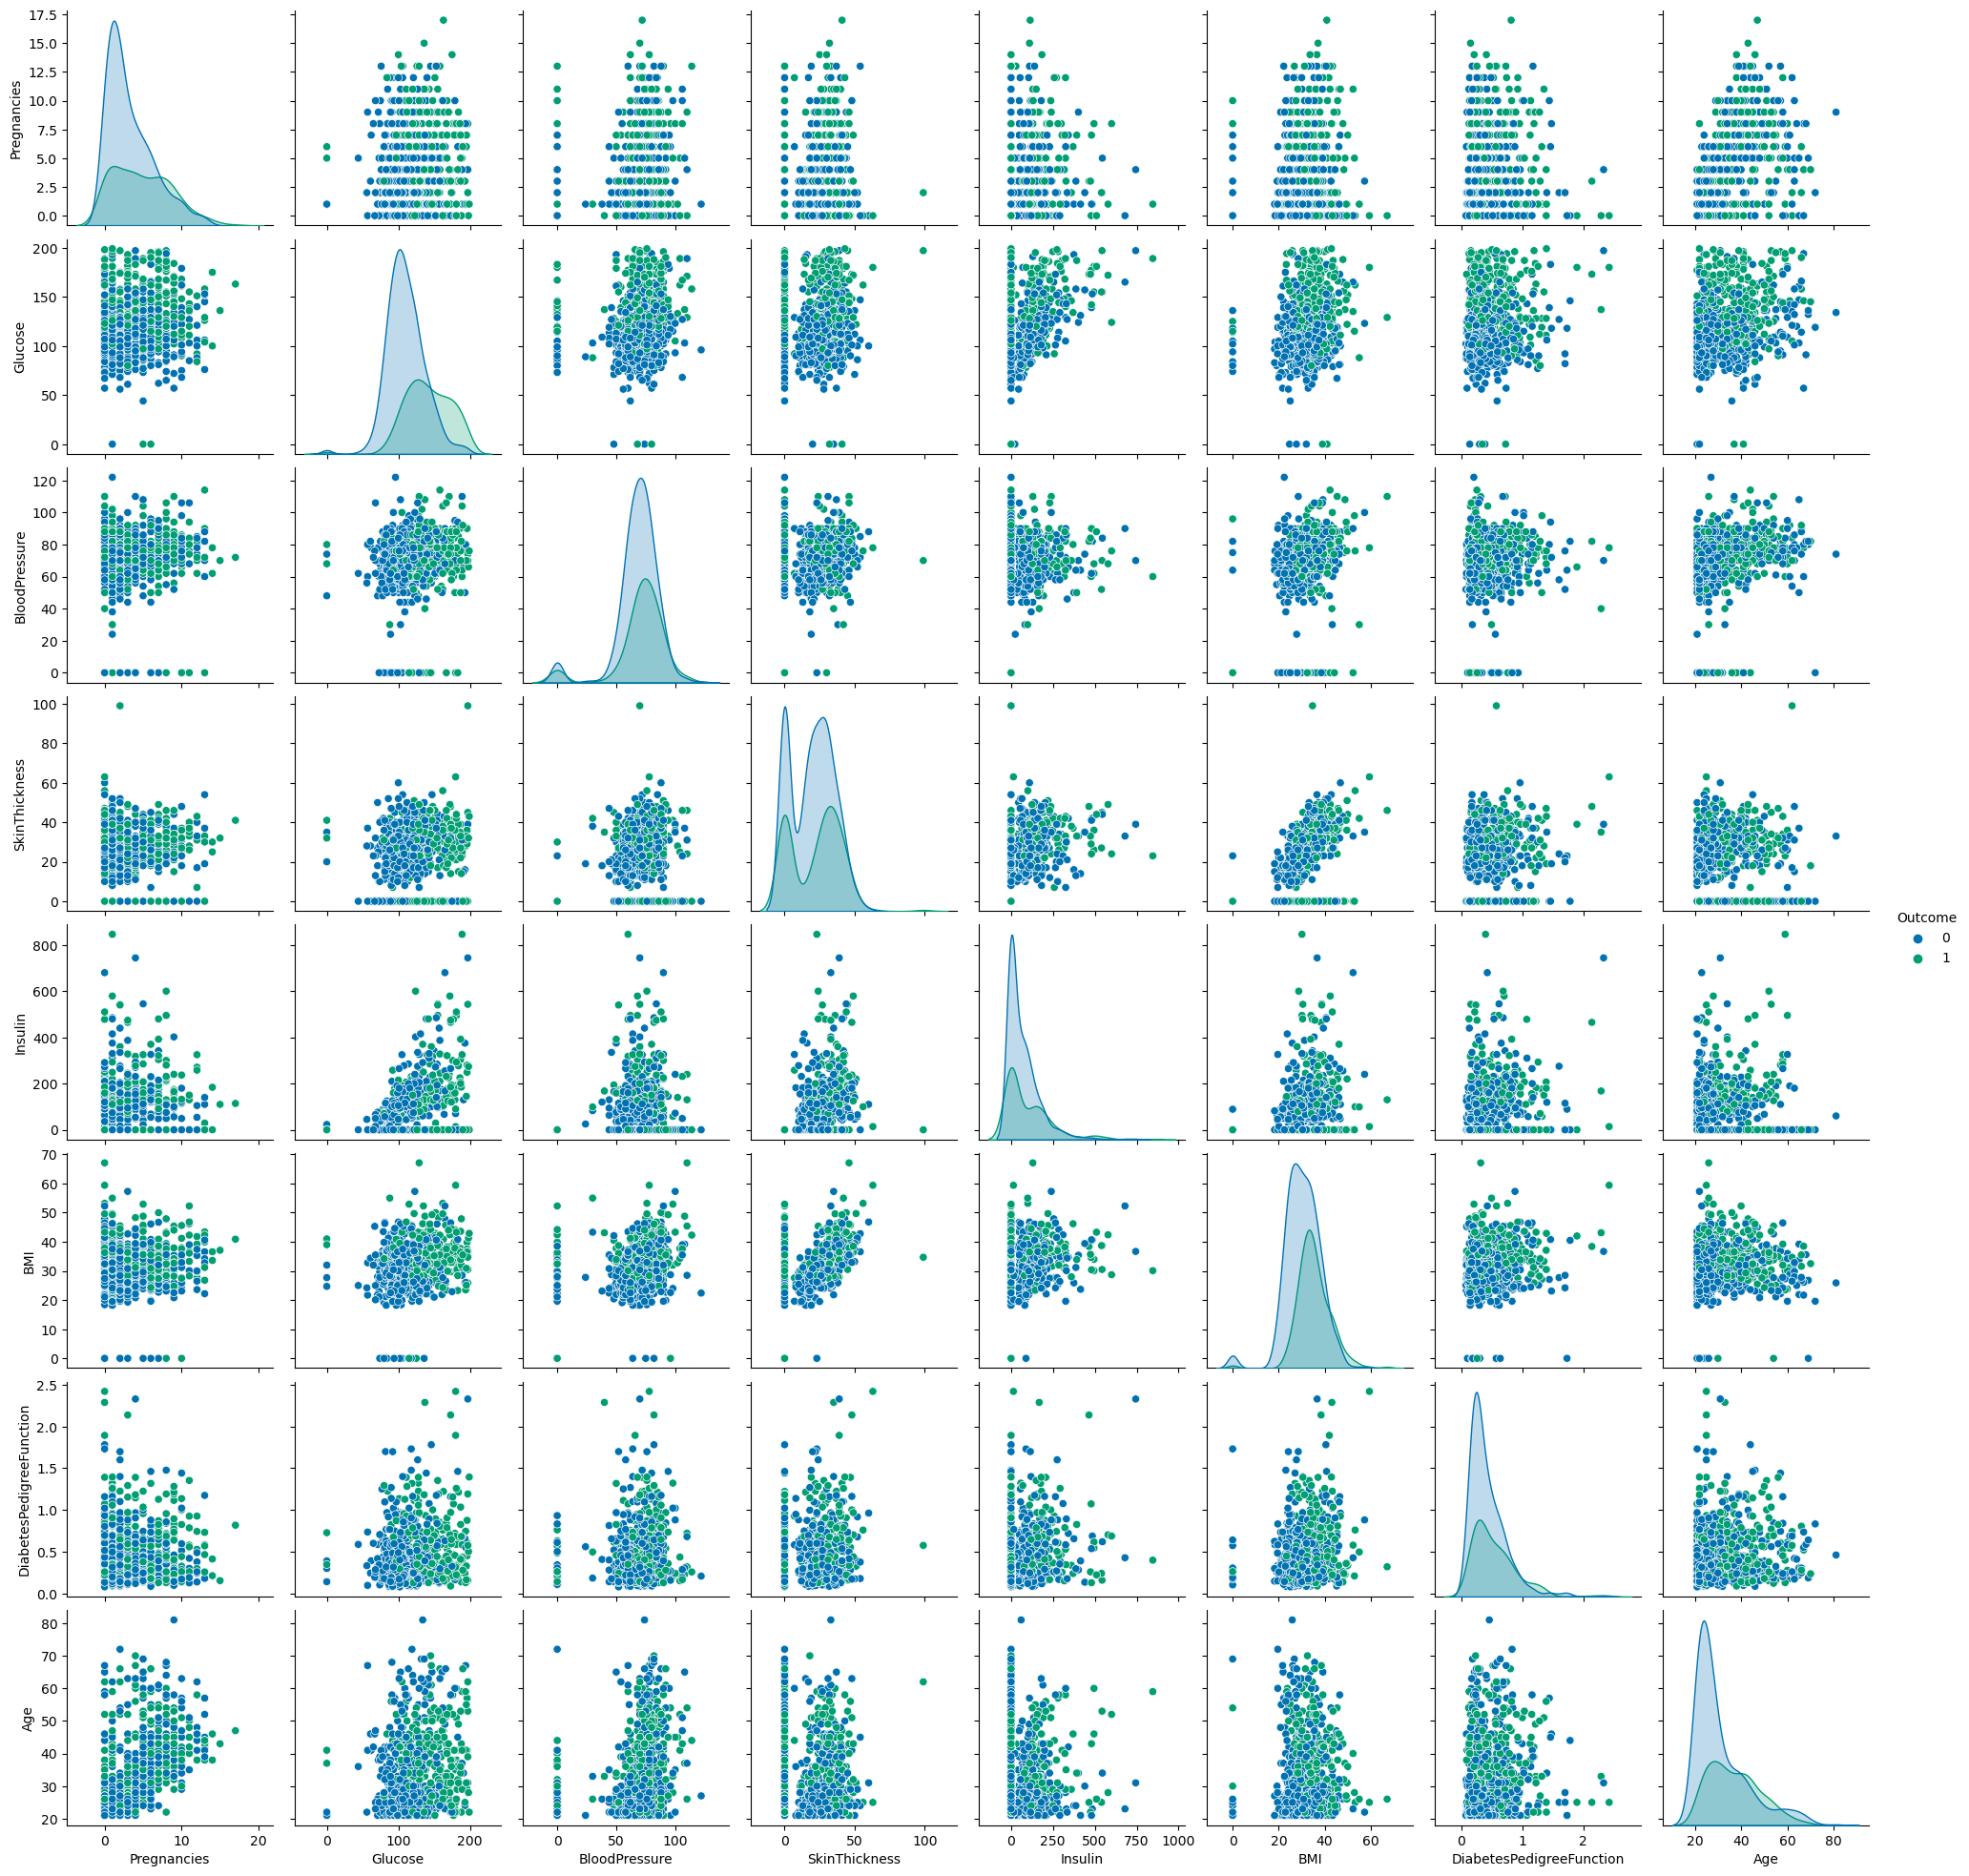

In [4]:
sns.pairplot(df, hue='Outcome')

Baseline model

In [5]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

y_pred = np.zeros(y_val.shape)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")


The accuracy is 0.6493506493506493
The recall is 0.0
The precision is 0.0


c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression using only Glucose and BMI

In [6]:
features = ['Glucose', 'BMI']
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('lr', LogisticRegression())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")
print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7662337662337663
The recall is 0.43209876543209874
The precision is 0.813953488372093
The avg. CV score is 0.7579143389199255


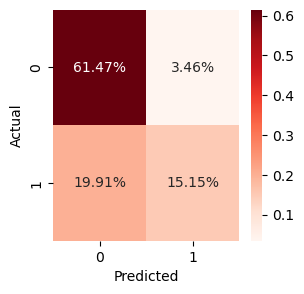

In [7]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

LR using All features

In [8]:
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('lr', LogisticRegression())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")
print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7575757575757576
The recall is 0.5185185185185185
The precision is 0.711864406779661
The avg. CV score is 0.7839851024208566


KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', KNeighborsClassifier(n_neighbors=15))])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7835497835497836
The recall is 0.5308641975308642
The precision is 0.7818181818181819
The avg. CV score is 0.7374301675977654


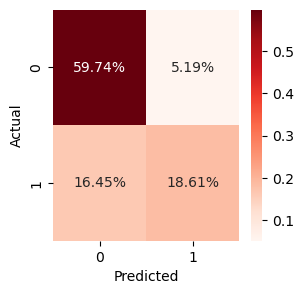

In [10]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

SVM

In [11]:
from sklearn.svm import SVC

In [12]:
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', SVC())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7532467532467533
The recall is 0.5061728395061729
The precision is 0.7068965517241379
The avg. CV score is 0.7765363128491619


SVM with RBF kernel

In [13]:
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', SVC(gamma=2, C=1))])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.6666666666666666
The recall is 0.09876543209876543
The precision is 0.6666666666666666
The avg. CV score is 0.6480446927374302


Decision trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf', DecisionTreeClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7532467532467533
The recall is 0.5925925925925926
The precision is 0.6666666666666666
The avg. CV score is 0.670391061452514


Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',RandomForestClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7575757575757576
The recall is 0.5308641975308642
The precision is 0.7049180327868853
The avg. CV score is 0.7579143389199254


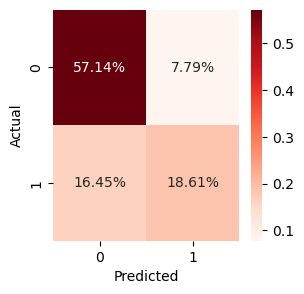

In [16]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [17]:
pipe['clf'].feature_importances_

array([0.08309352, 0.25491287, 0.0891484 , 0.07171086, 0.06111249,
       0.16546698, 0.13651309, 0.13804178])

In [18]:
df.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Model with only the most important features

In [19]:
features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',RandomForestClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7748917748917749
The recall is 0.7160493827160493
The precision is 0.6666666666666666
The avg. CV score is 0.74487895716946


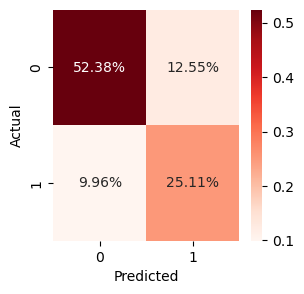

In [20]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

adaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',AdaBoostClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7186147186147186
The recall is 0.5061728395061729
The precision is 0.6212121212121212
The avg. CV score is 0.7579143389199254


XGBoost

In [23]:
from xgboost import XGBClassifier

features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',XGBClassifier())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")


c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:36:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy is 0.7402597402597403
The recall is 0.5432098765432098
The precision is 0.6567164179104478
[19:36:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\nikhi_ntf2doa\anaconda3\envs\data_sci\l

[19:36:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:36:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The avg. CV score is 0.7225325884543762


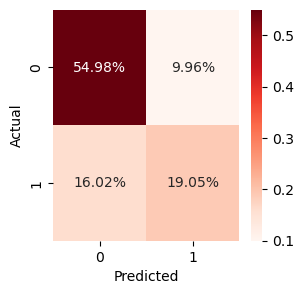

In [24]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Neural Network

In [25]:
from sklearn.neural_network import MLPClassifier
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('clf',MLPClassifier(random_state=1, max_iter=500,
        learning_rate_init= 0.2))])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")

print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7402597402597403
The recall is 0.6419753086419753
The precision is 0.6265060240963856
The avg. CV score is 0.7281191806331471


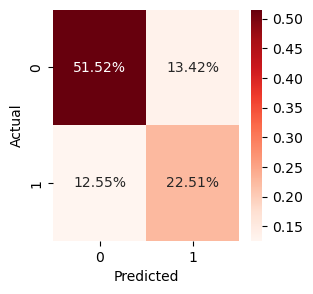

In [26]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Dim. reduction  : PCA

In [27]:
from sklearn.decomposition import PCA
features = df.columns[:-1]
X = df[features]
y = df['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.3)

pipe = Pipeline([('scaler' , StandardScaler()),
('pca',PCA(n_components=4)),
('lr', LogisticRegression())])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_val)

print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")
print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")

The accuracy is 0.7705627705627706
The recall is 0.6049382716049383
The precision is 0.7
The avg. CV score is 0.7281191806331471


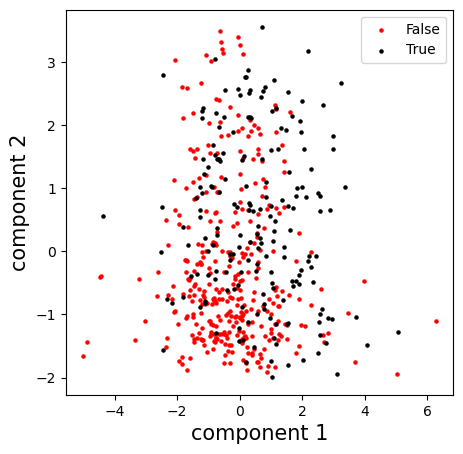

In [28]:
XX = pipe['pca'].transform(pipe['scaler'].transform(X_train))

component1_F=XX[(y_train==0), 0]
component1_T=XX[(y_train==1), 0]
component2_F=XX[(y_train==0), 1]
component2_T=XX[(y_train==1), 1]

fig, ax = plt.subplots(figsize= (5,5))
ax.scatter(component1_F, component2_F, s=5, c='r', label='False')
ax.scatter(component1_T, component2_T, s=5, c='k', label='True')

ax.set_xlabel('component 1', size=15)
ax.set_ylabel('component 2', size=15)

ax.legend()
plt.show()

In [29]:
print(f"explained variance ratio (first two components): {pipe['pca'].explained_variance_ratio_}")

explained variance ratio (first two components): [0.25597718 0.21900909 0.12860584 0.11222554]


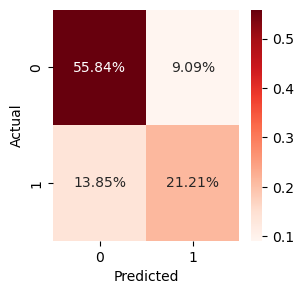

In [30]:
cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), ax=ax, annot=True, 
            fmt='.2%', cmap='Reds')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

To do :

- Hyperparameter optimization
- Precision, Recall, Accuracy
- ROC-AUC curve
- Unsupervised Clustering




In [31]:
print(f"The accuracy is {accuracy_score(y_val, y_pred)}")
print(f"The recall is {recall_score(y_val, y_pred)}")
print(f"The precision is {precision_score(y_val, y_pred)}")
print(f"The avg. CV score is {cross_val_score(pipe, X_train, y_train, cv=3).mean()}")
print(f"The f1-score is {f1_score(y_val, y_pred)}")

The accuracy is 0.7705627705627706
The recall is 0.6049382716049383
The precision is 0.7
The avg. CV score is 0.7281191806331471
The f1-score is 0.6490066225165563


Accuracy : correctness of classification. This counts the (TP+TN/ Total) i.e. sum of diagonal entries in the confusion matrix

Precision : Out of all the instances classified as 1, how many are actually 1? 

Recall :  Out of all the actual 1s, how many are classified as 1?

F1-score : Harmonic mean of precision and recall.



In [32]:
cf_matrix

array([[129,  21],
       [ 32,  49]], dtype=int64)

In [33]:
acc = (134+35)/(134+16+46+35)
acc

0.7316017316017316

In [34]:
Prec = 35/(35+16)
Prec

0.6862745098039216

In [35]:
rec = 35/(35+46)
rec

0.43209876543209874

In [36]:
Fs = 2*Prec*rec/(Prec+rec)
Fs 

0.5303030303030304

### Example : Rare disease testing.

Suppose that 2% of all patients who take a test are actually positive for a disease. 

Consider a naive model which simply says everyone is negative (i.e. 2% False negatives)

What are the Accuracy, Precision, Recall of this model?

Answer:

Accuracy is 98%!

Precision is 0

Recall is 0

F1 score is undefined.


Consider another naive model which simply says everyone is positive.( i.e. 98 % False positives)

What are the Accuracy, Precision, Recall of this model?

Answer:

Accuracy is 2%!

Precision is 2%

Recall is 100%

F1 score is 3.92%.


Consider another naive model which is a fair coin-toss to decide the test results.

What are the average Accuracy, Precision, Recall of this model?

Answer:

True positive: The patient is positive and the model predicts positive 

0.02 * 0.5 = 0.01 = 1%

True negative: The patient is negative and the model predicts negative 

0.98 *0.5 = 0.49 = 49%

False positive : The patient is negative and the model predicts positive

0.98*0.5 = 49 %

False negative : The patient is positive and the model predicts negative

0.02*0.5 = 1%


Thus,

Accuracy = 1+49/100 = 50%

Precision = 1/50 = 2%

Recall = 50%

F-1 score = 3.84 %

